In [18]:
import pandas as pd
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [8]:
DATA_PATH = './data/submission/'
FILE_NAMEs = os.listdir(DATA_PATH)

In [6]:
with open('./data/tags.json') as f:
    tags_dataset = json.load(f)

In [50]:
contest_count = 0
submission_count = 0
problem_submission = defaultdict(int)
author_submission = defaultdict(int)
lang = defaultdict(int)

for fn in FILE_NAMEs[:]:
    df = pd.read_csv(open(DATA_PATH + fn, 'r'), encoding='utf-8', engine='c')
    
    if len(df):
        contest_count += 1
        submission_count += len(df)
        
    for x in df['problem']:
        problem_submission[x] += 1

    for x in df['author']:
        author_submission[x] += 1

    for x in df['language']:
        lang[x] += 1

In [51]:
print(f'The dataset contains {contest_count} contests, {len(problem_submission)} problems and {submission_count} solutions from {len(author_submission)} users or teams')

The dataset contains 1385 contests, 6814 problems and 8257052 solutions from 292067 users or teams


In [63]:
import math

In [74]:
import seaborn as sns
sns.set_style("white")

Text(0.5, 1.0, 'Number of Solutions by Problem')

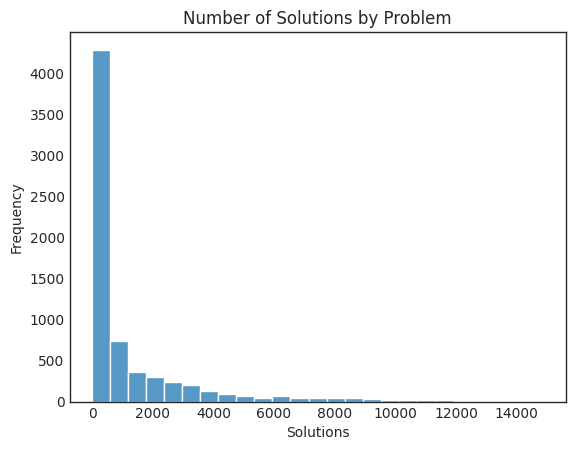

In [86]:
sns.histplot(list(problem_submission.values()), bins=25)
plt.xlabel('Solutions')
plt.ylabel('Frequency')
plt.title('Number of Solutions by Problem')


Text(0.5, 1.0, 'Log(Number of Solutions) by Problem')

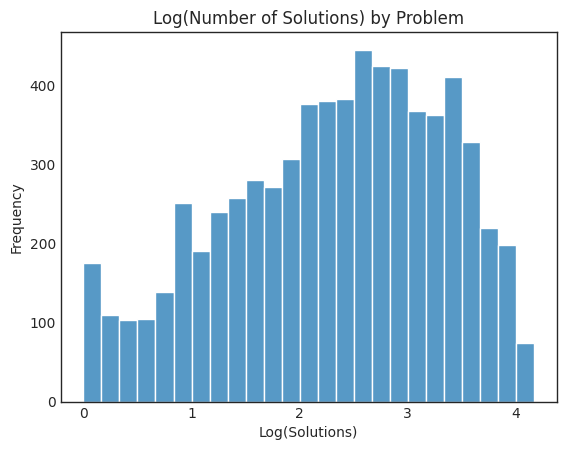

In [97]:
sns.histplot([math.log(x, 10) for x in problem_submission.values()], bins=25)
plt.xlabel('Log(Solutions)')
plt.ylabel('Frequency')
plt.title('Log(Number of Solutions) by Problem')


Text(0.5, 1.0, 'Number of Solutions by Author/Team')

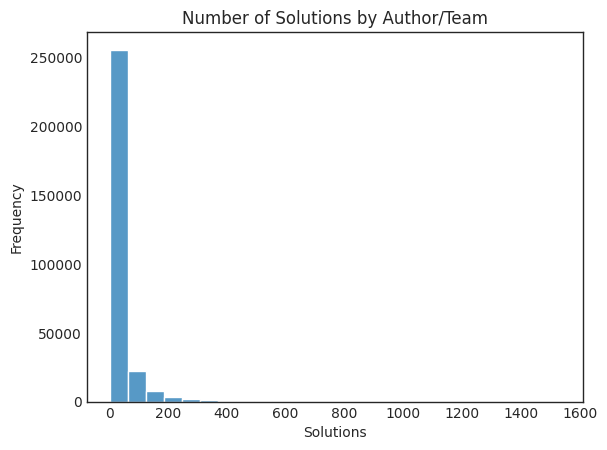

In [93]:
sns.histplot(list(author_submission.values()), bins=25)
plt.xlabel('Solutions')
plt.ylabel('Frequency')
plt.title('Number of Solutions by Author/Team')


Text(0.5, 1.0, 'Log(Number of Solutions) by Author/Team')

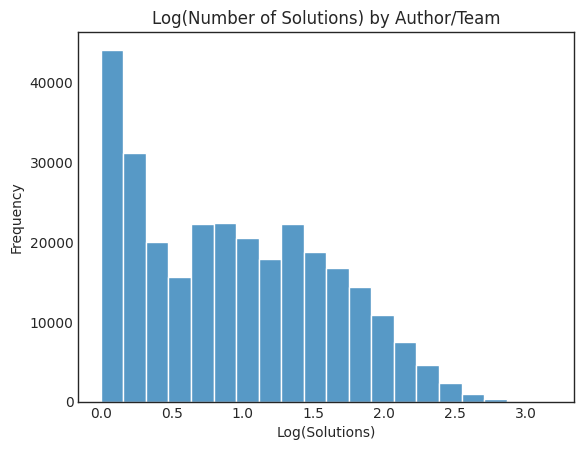

In [96]:
sns.histplot([math.log(x, 10) for x in author_submission.values()], bins=20)
plt.xlabel('Log(Solutions)')
plt.ylabel('Frequency')
plt.title('Log(Number of Solutions) by Author/Team')


In [99]:
tags_count_by_problem = defaultdict(int)
tags_count = defaultdict(int)
for x in problem_submission:
    tags_count_by_problem[x] = len(tags_dataset[x])
    for y in tags_dataset[x]:
        tags_count[y] += 1


Text(0.5, 1.0, 'Number of Tags by Problem')

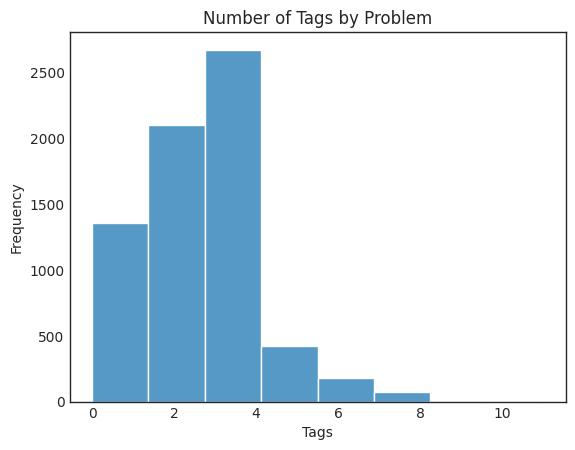

In [104]:
sns.histplot(list(tags_count_by_problem.values()), bins=8)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Number of Tags by Problem')


In [109]:
tags_count = dict(sorted(tags_count.items(), key=lambda x: -x[1]))

In [125]:
print(len(tags_count))

37


<AxesSubplot: title={'center': 'Number of Problems by Tag'}, xlabel='Problems'>

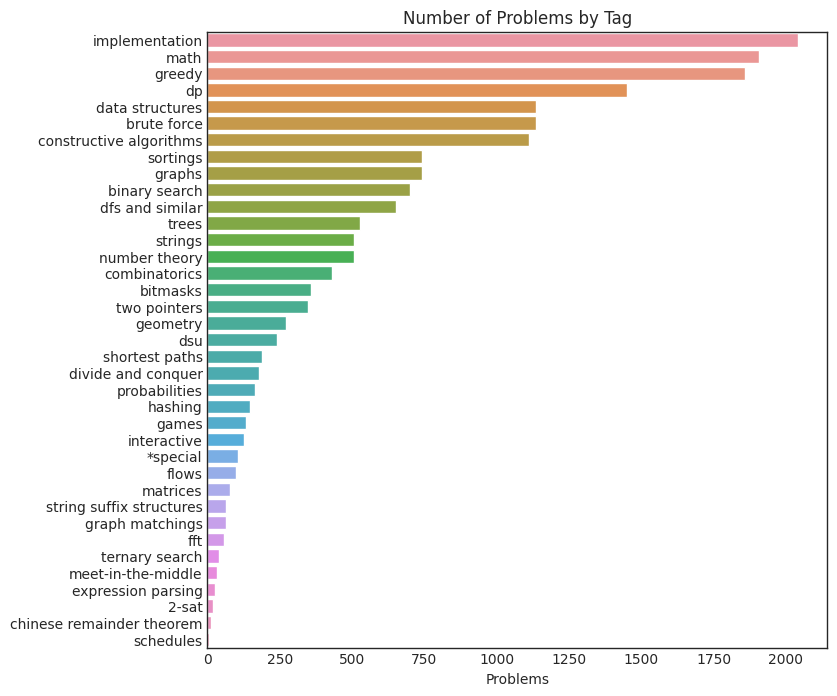

In [124]:
plt.figure(figsize=(8, 8))
plt.xlabel('Problems')
plt.title('Number of Problems by Tag')
sns.barplot(y=list(tags_count.keys()), x=list(tags_count.values()))